# K-Means Kümeleme Algoritması

Bu notebook, makine öğrenmesinde sıkça kullanılan kümeleme algoritmalarından biri olan K-Means algoritmasını detaylı bir şekilde açıklamaktadır. K-Means algoritmasının teorik açıklaması, avantajları, dezavantajları, farklı veri setlerinde nasıl çalıştığı ve Python ile nasıl uygulanacağı hakkında bilgiler içermektedir.

## İçindekiler
1. K-Means Nedir?
2. K-Means Algoritmasının Adımları
3. Avantajları ve Dezavantajları
4. Python ile K-Means Uygulaması
   - Veri Setinin Oluşturulması
   - Veri Setinin Görselleştirilmesi
   - K-Means Modelinin Eğitilmesi
   - Sonuçların Görselleştirilmesi
5. Küme Sayısının Belirlenmesi
6. Sonuç ve Değerlendirme


## 1. K-Means Nedir?

K-Means, veriyi belirli sayıda kümeye ayırmak için kullanılan bir kümeleme algoritmasıdır. Her küme, veri noktalarının merkezine (centroid) en yakın olduğu bir grup olarak tanımlanır. Amaç, her veri noktasını en yakın merkezle eşleştirerek kümeleri oluşturmaktır.

## 2. K-Means Algoritmasının Adımları

K-Means algoritması şu adımları izler:
1. Küme sayısını (K) belirleyin.
2. Veriler arasından rastgele K tane merkez (centroid) seçin.
3. Her veri noktasını en yakın merkeze atayın.
4. Her küme için yeni merkezler hesaplayın.
5. Adım 3 ve 4'ü merkezler değişmeyene kadar tekrarlayın.

## 3. Avantajları ve Dezavantajları

### Avantajları
- Basit ve hızlı bir algoritmadır.
- Büyük veri setlerinde bile hızlı çalışır.
- Küme sayısı bilindiğinde iyi sonuçlar verir.

### Dezavantajları
- Küme sayısının (K) önceden belirlenmesi gerekir.
- Başlangıç merkezlerinin seçimine duyarlıdır.
- Küresel olmayan (non-spherical) ve farklı yoğunluklardaki kümelerde iyi sonuç vermez.

## 4. Python ile K-Means Uygulaması

Şimdi, K-Means algoritmasını bir örnek veri seti üzerinde uygulayalım. Bu örnekte, sklearn kütüphanesini kullanacağız.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

### 4.1 Veri Setinin Oluşturulması

make_blobs fonksiyonu ile örnek bir veri seti oluşturalım.

In [2]:
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=0.60)

### 4.2 Veri Setinin Görselleştirilmesi

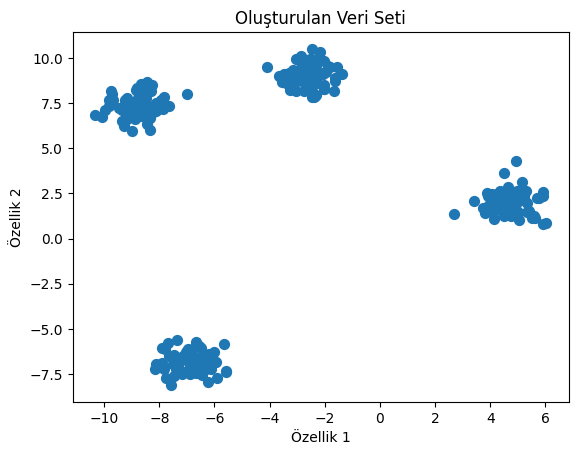

In [3]:
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Oluşturulan Veri Seti")
plt.xlabel("Özellik 1")
plt.ylabel("Özellik 2")
plt.show()

### 4.3 K-Means Modelinin Eğitilmesi

K-Means modelini oluşturup eğitelim.

In [4]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

### 4.4 Sonuçların Görselleştirilmesi

Her küme için farklı bir renk kullanarak sonuçları görselleştirelim.

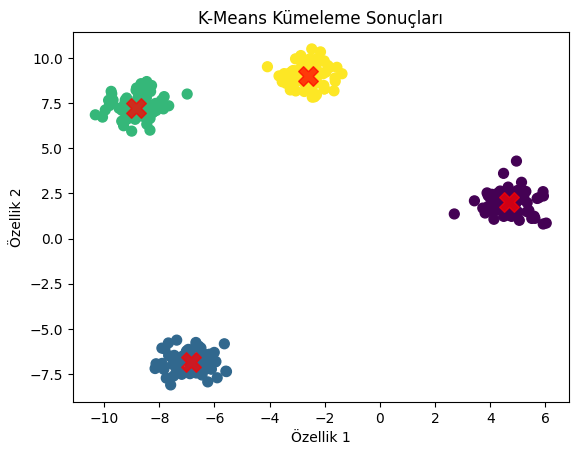

In [5]:
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-Means Kümeleme Sonuçları")
plt.xlabel("Özellik 1")
plt.ylabel("Özellik 2")
plt.show()

## 5. Küme Sayısının Belirlenmesi

K-Means algoritmasında küme sayısının (K) doğru seçilmesi çok önemlidir. Küme sayısını belirlemek için "Elbow Method" (Dirsek Yöntemi) kullanabiliriz.

### Elbow Method (Dirsek Yöntemi)

Bu yöntem, farklı K değerleri için inertia (her kümedeki veri noktalarının merkezlerine olan uzaklıklarının karesinin toplamı) değerlerini hesaplar ve bu değerlerin grafiğini çizer. Grafikte, eğrinin "dirsek" yaptığı nokta optimal K değerini gösterir.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

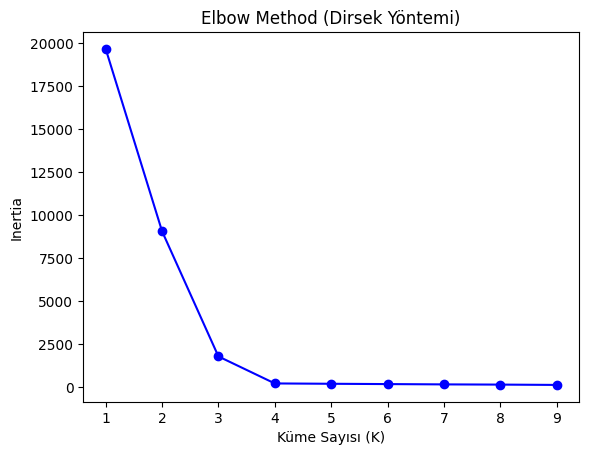

In [6]:
inertia_values = []
K_range = range(1, 10)

for K in K_range:
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(K_range, inertia_values, 'bo-')
plt.title("Elbow Method (Dirsek Yöntemi)")
plt.xlabel("Küme Sayısı (K)")
plt.ylabel("Inertia")
plt.show()

Grafikte görüldüğü gibi, 4 küme sayısı optimal bir seçimdir çünkü inertia değerinin azalma hızının yavaşladığı noktadır.

## 6. Sonuç ve Değerlendirme

Bu notebookta K-Means kümeleme algoritmasının temel prensiplerini ve Python ile nasıl uygulanacağını öğrendik. K-Means, veriyi kümelere ayırmak için etkili bir yöntemdir, ancak doğru küme sayısının belirlenmesi ve başlangıç merkezlerinin seçimi konusunda dikkatli olunmalıdır.

### Ek Notlar
- K-Means++: K-means algoritmasının bir varyantıdır ve başlangıç merkezlerinin daha akıllıca seçilmesini sağlar.
- Küresel Olmayan Kümeler: K-means, küresel olmayan veya farklı yoğunluklardaki kümelerde iyi çalışmayabilir. Bu durumlarda DBSCAN veya Hierarchical Clustering gibi diğer algoritmalar tercih edilebilir.